In [2]:
pwd

'/home/dev/Documents/MachineLearning'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("/home/dev/Documents/Datasets/Housing.csv", header=0)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.shape

(545, 13)

In [7]:
#Univariate Analysis
#EDD(Extended Data Dictionary)

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


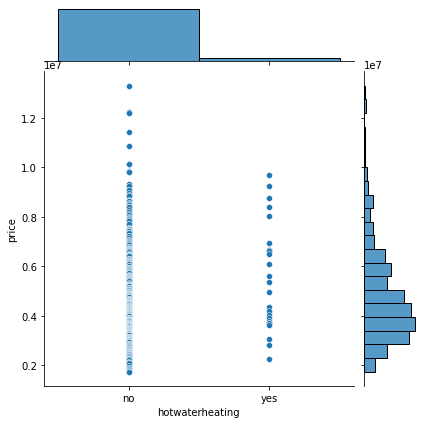

In [8]:
sns.jointplot(x='hotwaterheating',y='price',data=df)

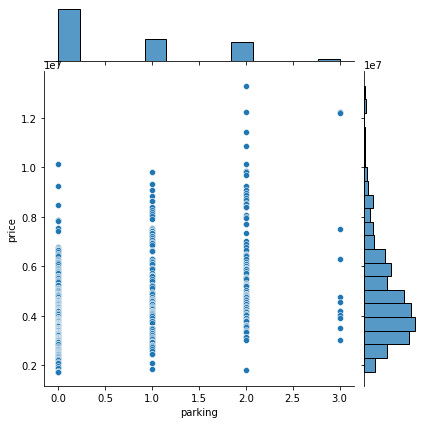

In [9]:
sns.jointplot(x='parking',y='price',data=df)

<AxesSubplot:xlabel='hotwaterheating', ylabel='count'>

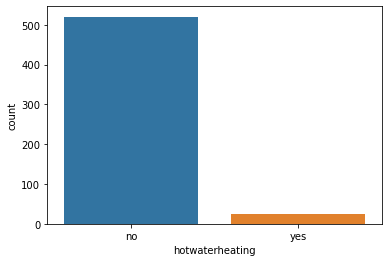

In [10]:
sns.countplot(x='hotwaterheating',data=df)

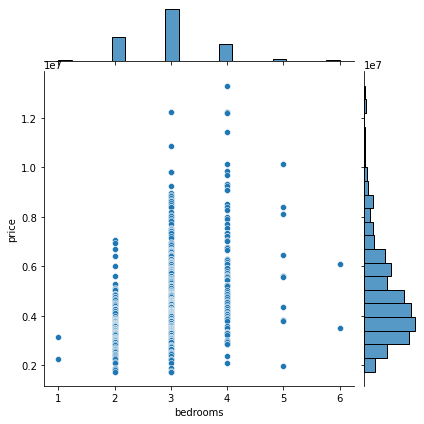

In [11]:
sns.jointplot(x='bedrooms',y='price',data=df)

# Outlier Treatment

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
np.percentile(df.price,[99])

array([10541999.99999996])

In [17]:
np.percentile(df.price,[99])[0]

10541999.999999963

In [15]:
up=np.percentile(df.price,[99])[0]

In [16]:
df[(df.price)>up]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [18]:
df.price[(df.price)>3*up] = 3*up

<ipython-input-18-6ea2424a17cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price[(df.price)>3*up] = 3*up


In [19]:
lp = np.percentile(df.area,[1])[0]

In [20]:
df.area [(df.area)<0.3*up] = 0.3*up

<ipython-input-20-794128ffe327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area [(df.area)<0.3*up] = 0.3*up


In [21]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,3162600.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,3162600.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3162600.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,3162600.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,3162600.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3162600.0,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,3162600.0,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3162600.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,3162600.0,3,1,1,no,no,no,no,no,0,no,furnished


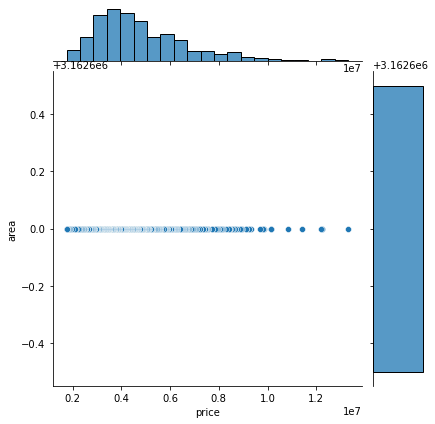

In [22]:
sns.jointplot(x="price",y="area",data=df)

# Missing Value Treatment

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [60]:
df = pd.read_csv("/home/dev/Documents/Datasets/House_Price.csv", header=0)

In [61]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

<AxesSubplot:xlabel='n_hos_beds'>

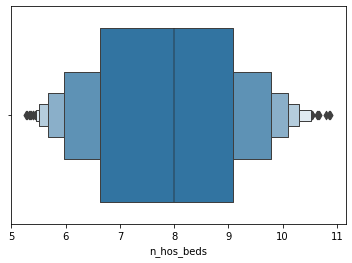

In [64]:
sns.boxenplot(x=df["n_hos_beds"])

In [65]:
#filling missing values with mean
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [50]:
df = df.fillna(df.mean()) #for all column simuntaneously but not preferred

# Seasonality

In [67]:
#variations in sales due to season dependability

In [68]:
#Solution- Calculating Multiiplication factor for each month as
# Mmonth = Meanofyear + Meanofmonth

# Bivariate Analysis

## Analysis of two variables simuntaneously
## explore concept of relationship between two variable

# TWO WAYS
    #SCATTER PLOT -> type and strength of relationship
    #CORRELATION  -> strength of a linear relationship 
#                 -> used to drop Non Usable Variable

# Variable Transformation
#

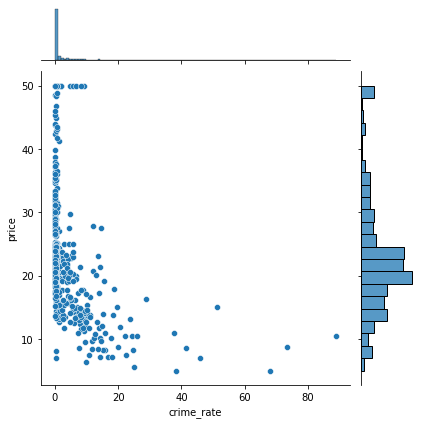

In [69]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [74]:
df.crime_rate = np.log(1+df.crime_rate)

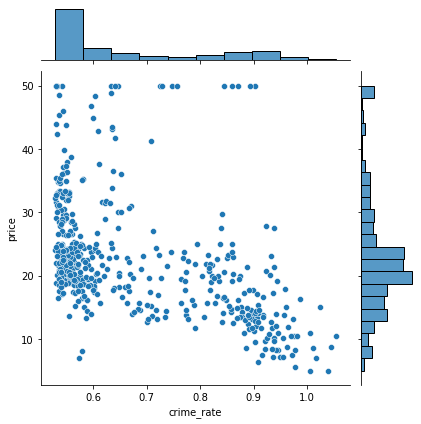

In [75]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [76]:
df["avg_dist"] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [77]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.670884,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,0.151187,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.528445,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.549171,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.588483,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,0.817523,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,1.054915,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [78]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [80]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.670884,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,0.151187,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.528445,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.549171,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.588483,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,0.817523,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,1.054915,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [81]:
del df['bus_ter']

In [82]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.670884,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,0.151187,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.528445,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.549171,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.588483,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,0.817523,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,1.054915,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [83]:
df = pd.get_dummies(df)

In [84]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.528445,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.534462,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.534456,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.535879,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.545799,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.544107,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,0.056006,2.4775,1,0,0,1,0,0
502,20.6,0.539438,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,0.059903,2.2875,0,1,0,1,0,0
503,23.9,0.543610,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,0.057572,2.1675,1,0,0,0,1,0
504,22.0,0.556087,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,0.060694,2.3900,0,1,0,0,1,0


In [86]:
del df["airport_NO"]

In [87]:
del df["waterbody_None"]

In [88]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.528445,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.534462,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,1,0,0
2,34.7,0.534456,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,0,0,0,0
3,33.4,0.535879,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,1,0,0
4,36.2,0.545799,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.544107,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.1792,27,0.056006,2.4775,0,0,1,0
502,20.6,0.539438,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.1648,20,0.059903,2.2875,1,0,1,0
503,23.9,0.543610,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.1912,31,0.057572,2.1675,0,0,0,0
504,22.0,0.556087,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.1760,47,0.060694,2.3900,1,0,0,0


# Corelation

In [89]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.453081,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.453081,1.000000,0.704489,0.766498,-0.287523,0.606428,-0.381192,0.610068,-0.002749,0.027066,0.080611,0.692973,-0.627268,-0.131462,-0.028430,0.012053,-0.059370
resid_area,-0.484754,0.704489,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.766498,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.287523,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.606428,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.381192,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.023343,-0.045836,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.610068,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.003337,0.061581,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.002749,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.005455,0.058628,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.023122,0.027066,-0.000839,-0.004882,0.030674,0.009380,-0.023343,0.003337,-0.005455,1.000000,-0.004840,0.006262,-0.010177,-0.066012,0.036442,-0.006133,-0.058431


In [90]:
del df['parks']